<a 
href="https://colab.research.google.com/github/adilo231/Python-for-machine-learning/blob/main/Chap -3- Analyse de donnees et visualisation/2-Pandas et Series Temporelles.ipynb" 
target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Séries temporelles

Développées à l'origine pour les séries chronologiques financières telles que les cours boursiers quotidiens, les structures de données robustes et flexibles des pandas peuvent être appliquées aux données de séries chronologiques dans n'importe quel domaine, y compris  la science, l'ingénierie, la santé publique et bien d'autres. Avec ces outils, vous pouvez facilement organiser, transformer, analyser et visualiser vos données à n'importe quel niveau de granularité - en examinant les détails pendant des périodes d'intérêt spécifiques et en effectuant un zoom arrière pour explorer les variations sur différentes échelles de temps, telles que les agrégations mensuelles ou annuelles, récurrentes modèles et tendances à long terme.

Dans la définition la plus large, une série chronologique est un ensemble de données où les valeurs sont mesurées à différents moments dans le temps. De nombreuses séries chronologiques sont espacées de manière uniforme à une fréquence spécifique, par exemple, des mesures météorologiques horaires, des comptages quotidiens de visites de sites Web ou des totaux de ventes mensuels. Les séries chronologiques peuvent également être irrégulièrement espacées et sporadiques, par exemple, des données horodatées dans le journal des événements d'un système informatique ou un historique des appels d'urgence au 911. Les outils de séries chronologiques de Pandas s'appliquent aussi bien aux deux types de séries chronologiques.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Chargement d'une Séries temporelles

In [2]:
bitcoin2 = pd.read_csv('Datasets/BTC-EUR.csv')
bitcoin2.head()

bitcoin = pd.read_csv('Datasets/BTC-EUR.csv', index_col='Date', parse_dates=True)
bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-10-04,3.700,3.821,3.746,3.750,3.750,1357
2011-10-05,3.750,3.820,3.650,3.676,3.676,3349
2011-10-06,3.676,3.743,3.450,3.550,3.550,6642
2011-10-07,3.550,3.590,2.900,3.293,3.293,7135
2011-10-08,3.293,3.283,2.872,2.890,2.890,2007


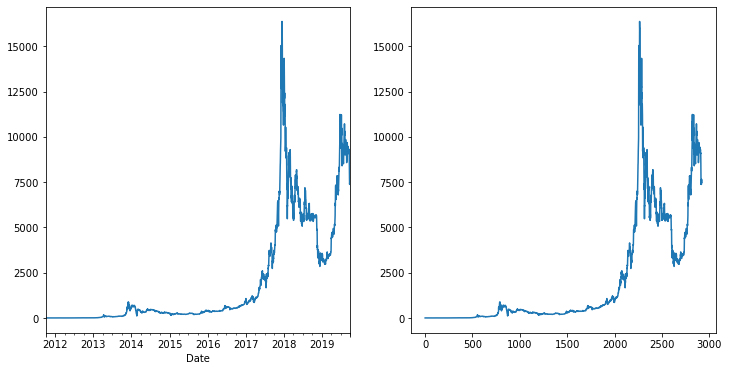

In [3]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
bitcoin['Close'].plot()
plt.subplot(1,2,2)
bitcoin2['Close'].plot()
plt.show()

In [4]:
bitcoin.index

DatetimeIndex(['2011-10-04', '2011-10-05', '2011-10-06', '2011-10-07',
               '2011-10-08', '2011-10-09', '2011-10-10', '2011-10-11',
               '2011-10-12', '2011-10-13',
               ...
               '2019-09-25', '2019-09-26', '2019-09-27', '2019-09-28',
               '2019-09-29', '2019-09-30', '2019-10-01', '2019-10-02',
               '2019-10-03', '2019-10-04'],
              dtype='datetime64[ns]', name='Date', length=2923, freq=None)

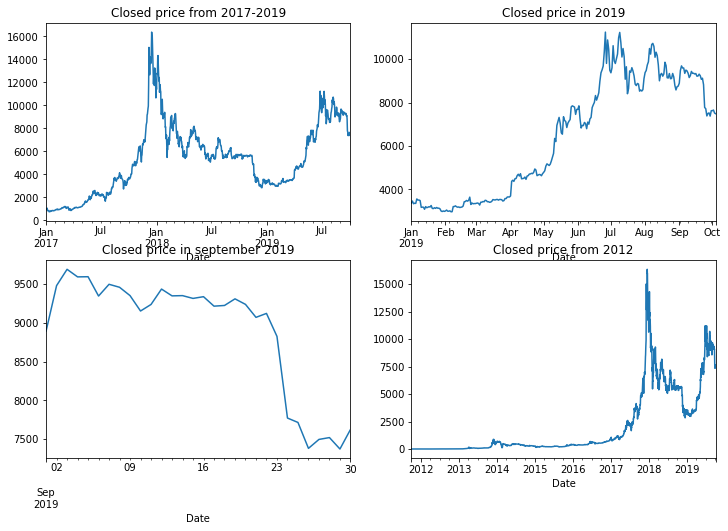

In [7]:
plt.figure(figsize=(12, 8))
plt.subplot(2,2,1)
bitcoin['2017':'2019']['Close'].plot()
plt.title("Closed price from 2017-2019")
plt.subplot(2,2,2)
bitcoin['2019']['Close'].plot()
plt.title("Closed price in 2019")
plt.subplot(2,2,3)
bitcoin['September-2019']['Close'].plot()
plt.title("Closed price in september 2019")
plt.subplot(2,2,4)
bitcoin['Close'].plot()
plt.title("Closed price from 2012")
plt.show()


### Resample

<ipython-input-5-5f9248b186fc>:6: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  bitcoin['2019']['Close'].resample('3W').plot()
<ipython-input-5-5f9248b186fc>:9: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  bitcoin['2019-09']['Close'].resample('W').plot()


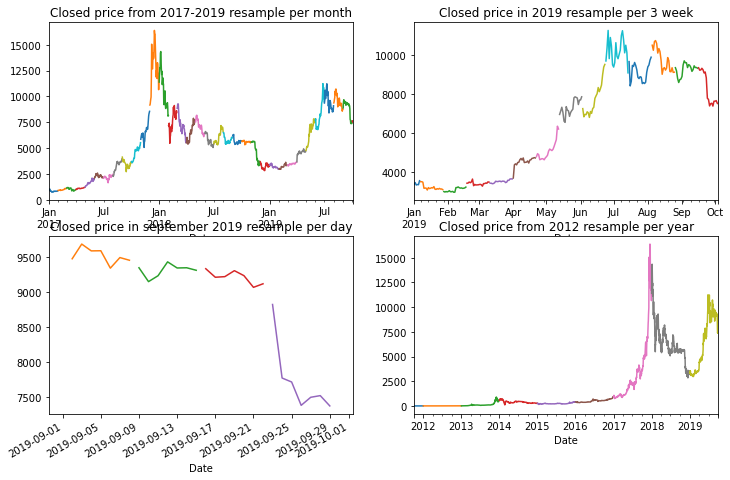

In [5]:
plt.figure(figsize=(12, 8))
plt.subplot(2,2,1)
bitcoin['2017':'2019']['Close'].resample('M').plot()
plt.title("Closed price from 2017-2019 resample per month")
plt.subplot(2,2,2)
bitcoin['2019']['Close'].resample('3W').plot()
plt.title("Closed price in 2019 resample per 3 week")
plt.subplot(2,2,3)
bitcoin['2019-09']['Close'].resample('W').plot()
plt.title("Closed price in september 2019 resample per day")
plt.subplot(2,2,4)
bitcoin['Close'].resample('Y').plot()
plt.title("Closed price from 2012 resample per year")
plt.show()


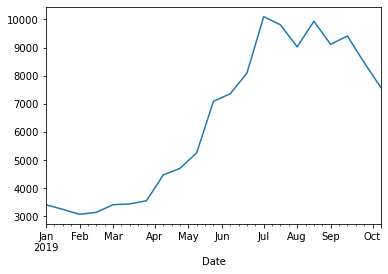

In [6]:
bitcoin.loc['2019', 'Close'].resample('2W').mean().plot()
plt.show()

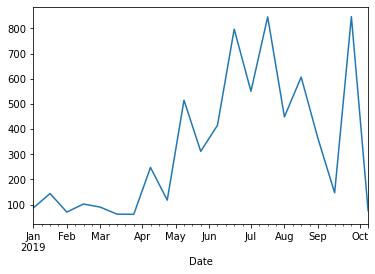

In [7]:
bitcoin.loc['2019', 'Close'].resample('2W').std().plot()
plt.show()

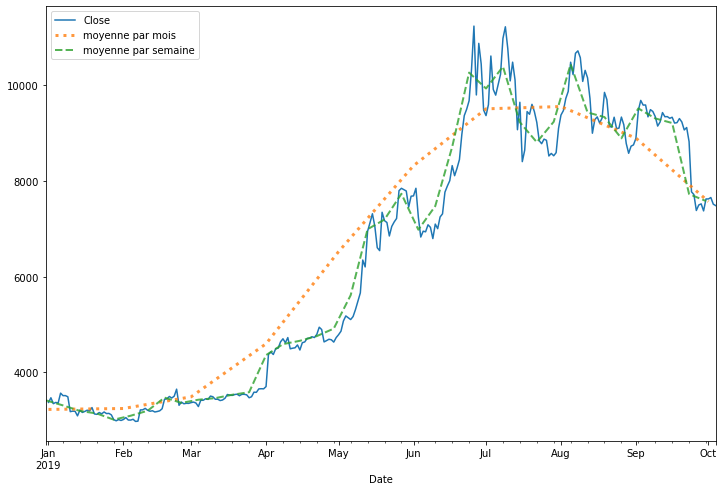

In [8]:
plt.figure(figsize=(12, 8))
bitcoin.loc['2019', 'Close'].plot()
bitcoin.loc['2019', 'Close'].resample('M').mean().plot(label='moyenne par mois', lw=3, ls=':', alpha=0.8)
bitcoin.loc['2019', 'Close'].resample('W').mean().plot(label='moyenne par semaine', lw=2, ls='--', alpha=0.8)
plt.legend()
plt.show()

### Aggregate

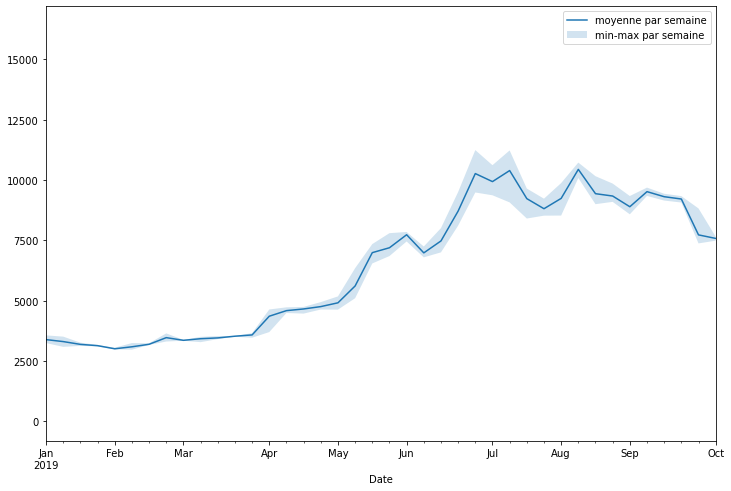

In [9]:
m = bitcoin['Close'].resample('W').agg(['mean', 'std', 'min', 'max'])

plt.figure(figsize=(12, 8))
m['mean']['2019'].plot(label='moyenne par semaine')
plt.fill_between(m.index, m['max'], m['min'], alpha=0.2, label='min-max par semaine')

plt.legend()
plt.show()

<AxesSubplot:xlabel='Date'>

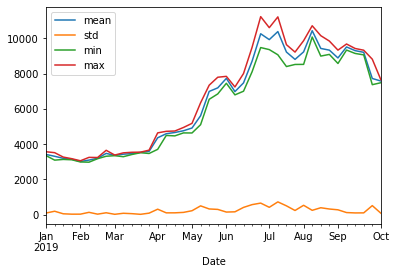

In [11]:
bitcoin.loc['2019', 'Close'].resample('W').agg(['mean', 'std', 'min', 'max']).plot()

## 4. Moving Average et EWM

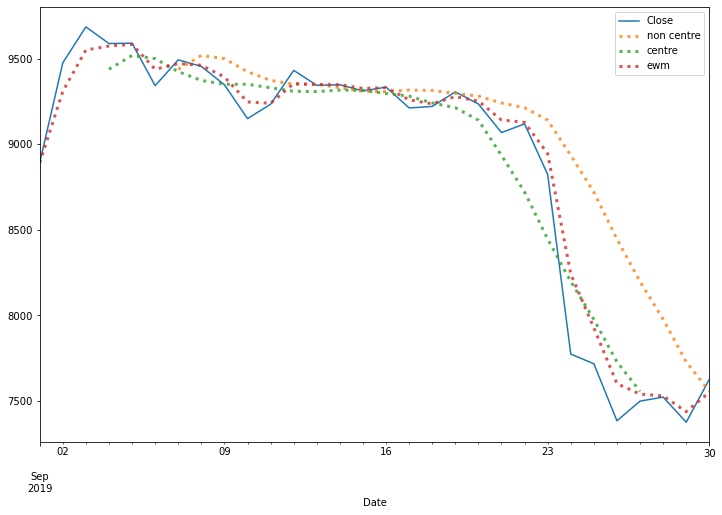

In [12]:
plt.figure(figsize=(12, 8))
bitcoin.loc['2019-09', 'Close'].plot()
bitcoin.loc['2019-09', 'Close'].rolling(window=7).mean().plot(label='non centre', lw=3, ls=':', alpha=0.8)
bitcoin.loc['2019-09', 'Close'].rolling(window=7, center=True).mean().plot(label='centre', lw=3, ls=':', alpha=0.8)
bitcoin.loc['2019-09', 'Close'].ewm(alpha=0.6).mean().plot(label='ewm', lw=3, ls=':', alpha=0.8)
plt.legend()
plt.show()

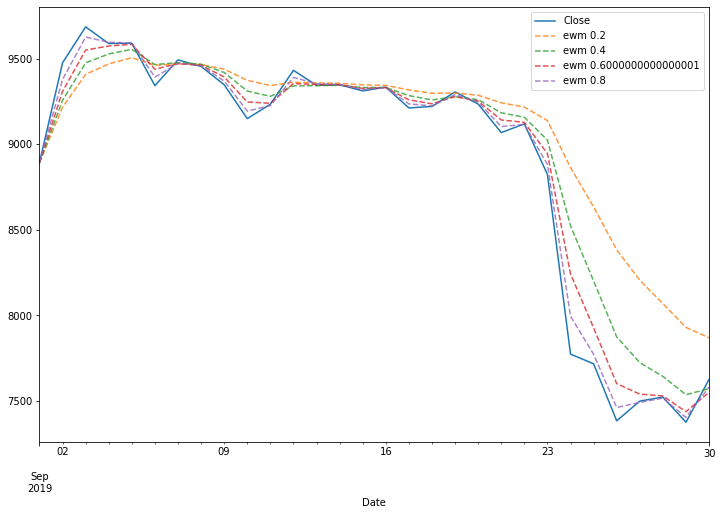

In [22]:
plt.figure(figsize=(12, 8))
bitcoin.loc['2019-09', 'Close'].plot()
for i in np.arange(0.2, 1, 0.2):
    bitcoin.loc['2019-09', 'Close'].ewm(alpha=i).mean().plot(label=f'ewm {i}', ls='--', alpha=0.8)
plt.legend()
plt.show()

### Comparaison de 2 série temporelles

In [27]:
ethereum = pd.read_csv('Datasets/ETH-USD22.csv', index_col='Date', parse_dates=True)
bitcoin2 = pd.read_csv('Datasets/BTC-USD22.csv', index_col='Date', parse_dates=True)

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

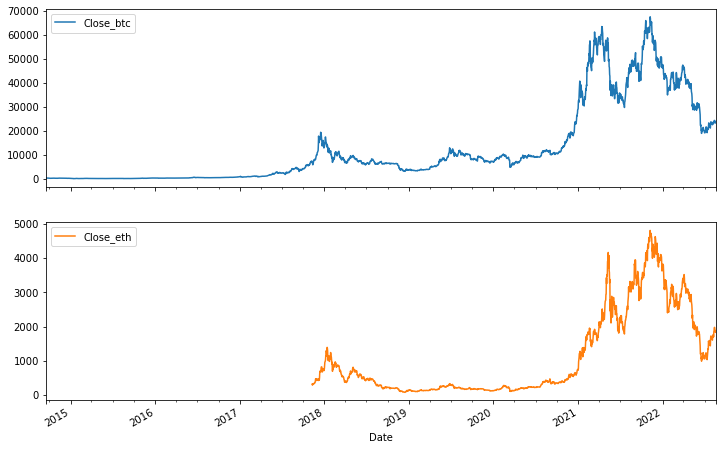

In [33]:

btc_eth = pd.merge(bitcoin2, ethereum, on='Date', how='outer', suffixes=('_btc', '_eth'))
btc_eth[['Close_btc', 'Close_eth']].plot(subplots=True,figsize=(12, 8))


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

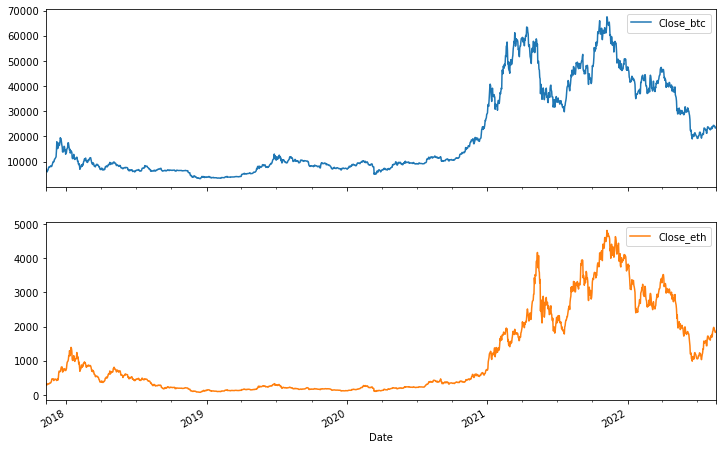

In [34]:
btc_eth = pd.merge(bitcoin2, ethereum, on='Date', how='inner', suffixes=('_btc', '_eth'))
btc_eth[['Close_btc', 'Close_eth']].plot(subplots=True,figsize=(12, 8) )

In [39]:
btc_eth[['Close_btc', 'Close_eth']].corr()

,Close_btc,Close_eth
Close_btc,1.000000,0.926472
Close_eth,0.926472,1.000000


## Exercice et Solution

Dans cet exercice, il s'agira de mettre en place la stratégie de la tortue qui est une technique de trading très ancienne afin de décider quand acheter ou vendre du bitcoin en fonction de la valeur de Close par rapport au minimum ou maximum des 28 derniers jours. Pour écrire ce code, vous devrez utiliser la fonction rowling :
- max sur les 28 derniers jours
- min au cours des 28 derniers jours
 Lorsque la valeur de Close est supérieure au maximum des 28 derniers jours c'est signe qu'il faut acheter et à l'inverse lorsqu'elle est inférieure au minimum des 28 derniers jours c'est signe qu'il faut absolument vendre .
- Si 'Fermer'> max 28 derniers jours alors Acheter =1
- Si 'Fermer'< min 28 derniers jours alors vendre = -1
 Vous pouvez également utiliser la méthode de décalage shift( 1 ) qui vous permet de décaler vos fenêtres d'autant de jours que vous le souhaitez afin de prendre vos décisions une à l'avance.

In [ ]:
data = bitcoin.copy()
data['Buy'] = np.zeros(len(data))
data['Sell'] = np.zeros(len(data))

In [ ]:
# votre code ici

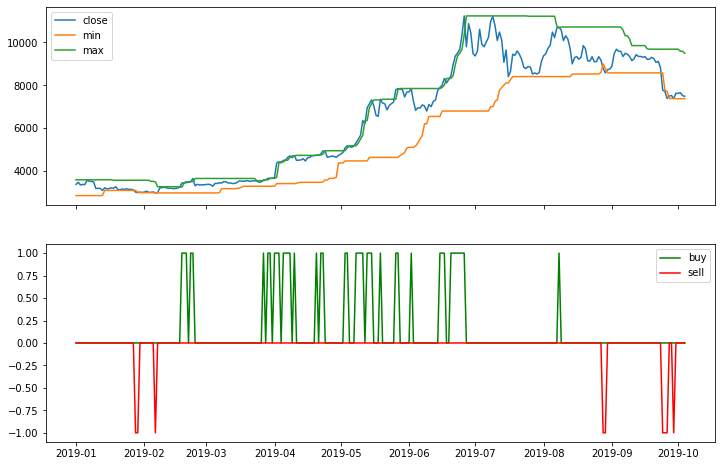

In [20]:
# votre code ici

In [ ]:
data['RollingMax'] = data['Close'].shift(1).rolling(window=28).max()
data['RollingMin'] = data['Close'].shift(1).rolling(window=28).min()
data.loc[data['RollingMax'] < data['Close'], 'Buy'] = 1
data.loc[data['RollingMin'] > data['Close'], 'Sell'] = -1

In [ ]:
start ='2019'
end='2019'
fig, ax = plt.subplots(2, figsize=(12, 8), sharex=True)
#plt.figure(figsize=(12, 8))
#plt.subplot(211)
ax[0].plot(data['Close'][start:end])
ax[0].plot(data['RollingMin'][start:end])
ax[0].plot(data['RollingMax'][start:end])
ax[0].legend(['close', 'min', 'max'])
ax[1].plot(data['Buy'][start:end], c='g')
ax[1].plot(data['Sell'][start:end], c='r')
ax[1].legend(['buy', 'sell'])